In [7]:
%config StoreMagics.autorestore = True
%reset -f
# %store -z
%store -r
%whos

Variable                  Type              Data/Info
-----------------------------------------------------
mathcalP                  LinearIOSystem    <LinearIOSystem>: sys[2]\<...>[[0. 0.]\n     [0. 0.]]\n
mathcalPext               LinearIOSystem    <LinearIOSystem>: sys[11]<...> [0. 0.]\n     [0. 0.]]\n
normInfMathcalP           float64           0.00838782148166998
normInfMathcalP_MIMO      ndarray           2x2: 4 elems, type `float64`, 32 bytes
normInfMathcalPext        float64           0.4397515745466738
normInfMathcalPext_MIMO   ndarray           3x2: 6 elems, type `float64`, 48 bytes


In [8]:
import numpy
import sympy
import scipy
import control
import matplotlib.pyplot as plt

from custom_utils import ControlUtils
from custom_utils import ODEUtils

from IPython.display import display
from IPython.display import Math
from IPython.display import Latex
from IPython.display import HTML

numpy.set_printoptions(precision=3)
sympy.init_printing(use_latex='mathjax', use_unicode=True)
sympy.init_printing()
plt.rcParams.update({ "text.usetex": True, "font.family": "Helvetica", "axes.titley": 1.0 })
%matplotlib inline

In [9]:
# Defining reduction parameters
fullOrder = mathcalPext.A.shape[0]
reducOrder = 5
display(Math("\\text{Full order} = " + str(fullOrder)))
display(Math("\\text{Reduced order} = " + str(reducOrder)))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [10]:
# hatMathcalPext = control.modelsimp.balred(extMathcalP, reducOrder, method='truncate')
hatMathcalPext, hsvMathcalPext, _ = ControlUtils.balaced_truncation(mathcalPext, reducOrder)
normInfHatMathcalPext, normInfHatMathcalPext_MIMO = ControlUtils.hinfnorm(hatMathcalPext)
display(Math('\\lVert \\widehat{\\mathcal{P}}_{ext} \\rVert_{\\infty} = ' + str(normInfHatMathcalPext)))

# Getting reduction error bound
epsilon = numpy.sum(hsvMathcalPext[reducOrder:])
display(Math('\\epsilon_{ext} = \\sum_{i=\\hat{n}_p+1}^{n_p} \\sigma_{i} = ' + str(epsilon)))

# Computing reduction error
mathcalEext = hatMathcalPext - mathcalPext
normInfExtMathcalEext, normExtMathcalEext_MIMO = ControlUtils.hinfnorm( mathcalEext )
display(Math('\\lVert \\mathcal{P}_{ext} - \\widehat{\\mathcal{P}}_{ext} \\rVert_{\\infty} = ' + str(normInfExtMathcalEext)))
display(Math('\\epsilon_{ext,w,v}  = ' + str(normExtMathcalEext_MIMO[0,0])))
display(Math('\\epsilon_{ext,w,dv}  = ' + str(normExtMathcalEext_MIMO[1,0])))
display(Math('\\epsilon_{ext,w,y}  = ' + str(normExtMathcalEext_MIMO[2,0])))
display(Math('\\epsilon_{ext,u,v}  = ' + str(normExtMathcalEext_MIMO[0,1])))
display(Math('\\epsilon_{ext,u,dv}  = ' + str(normExtMathcalEext_MIMO[1,1])))
display(Math('\\epsilon_{ext,u,y}  = ' + str(normExtMathcalEext_MIMO[2,1])))
display(Math('\\sum_{ i\\in\\{w,v\\}, j\\in\\{ v,\\dot{v}, y \\} } \\epsilon_{ext,i,j} = ' + str(numpy.sum(normExtMathcalEext_MIMO))))


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

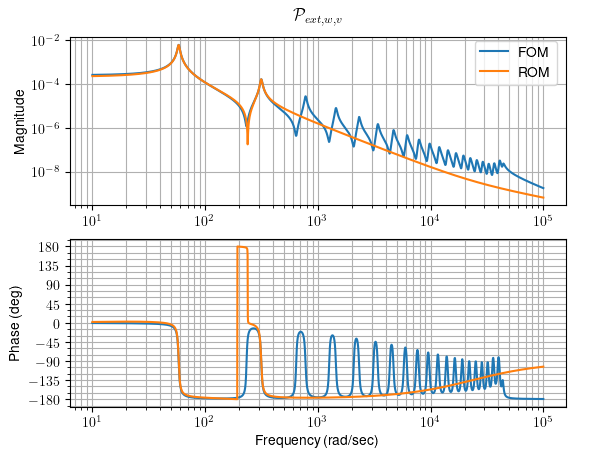

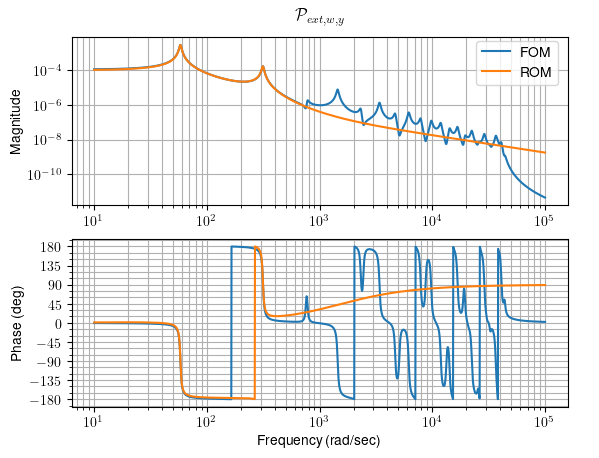

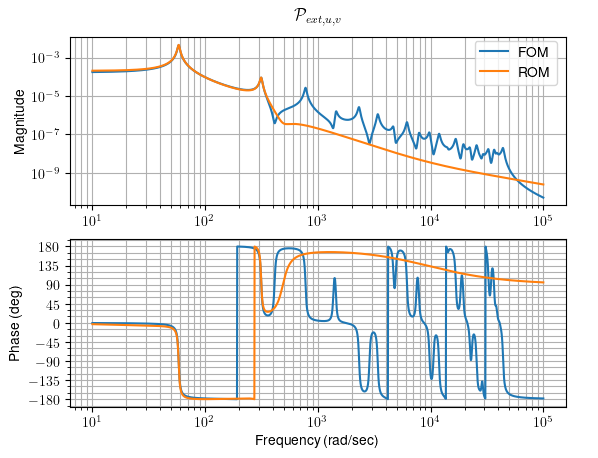

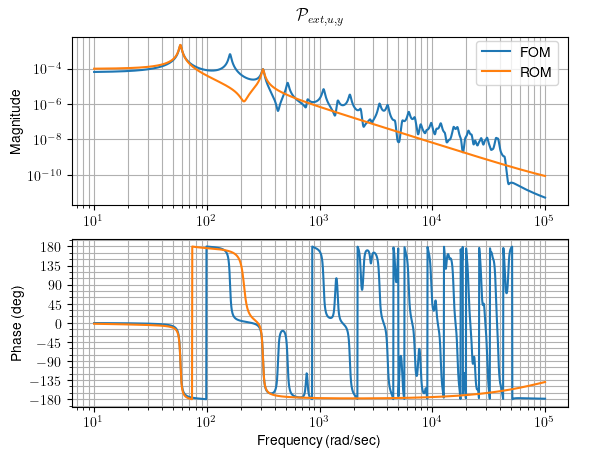

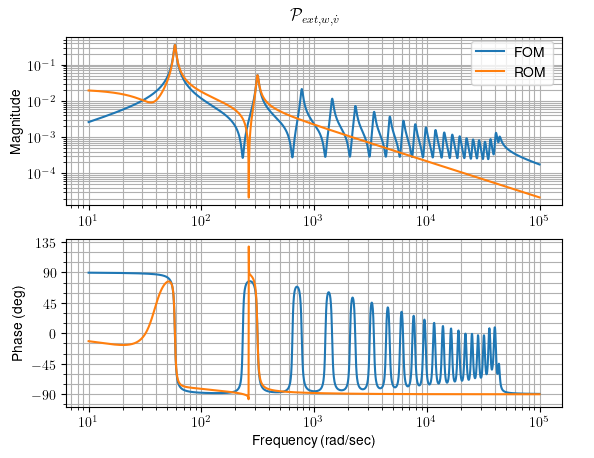

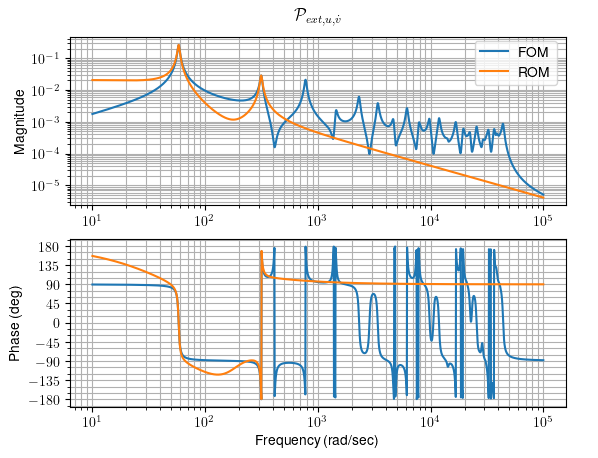

In [11]:
# Plotting FOM/ROM bodes for comparison
freq = numpy.logspace(1,5,2000) # rads/sec

control.bode_plot( mathcalPext[0,0], freq, label='FOM', wrap_phase=True, deg=True )
control.bode_plot( hatMathcalPext[0,0], freq, label='ROM', wrap_phase=True, deg=True )
plt.figlegend( ['FOM','ROM'], borderaxespad=3 )
plt.title( '$\\mathcal{P}_{ext,w,v}$', y=2.25 )
plt.show()

control.bode_plot( mathcalPext[2,0], freq, label='FOM', wrap_phase=True, deg=True )
control.bode_plot( hatMathcalPext[2,0], freq, label='ROM', wrap_phase=True, deg=True )
plt.figlegend( ['FOM','ROM'], borderaxespad=3 )
plt.title( '$\\mathcal{P}_{ext,w,y}$', y=2.25 )
plt.show()

control.bode_plot(mathcalPext[0,1], freq, label='FOM', wrap_phase=True, deg=True )
control.bode_plot(hatMathcalPext[0,1], freq, label='ROM', wrap_phase=True, deg=True )
plt.figlegend( ['FOM','ROM'], borderaxespad=3 )
plt.title( '$\\mathcal{P}_{ext,u,v}$', y=2.25 )
plt.show()

control.bode_plot(mathcalPext[2,1], freq, label='FOM', wrap_phase=True, deg=True )
control.bode_plot(hatMathcalPext[2,1], freq, label='ROM', wrap_phase=True, deg=True )
plt.figlegend( ['FOM','ROM'], borderaxespad=3 )
plt.title( '$\\mathcal{P}_{ext,u,y}$', y=2.25 )
plt.show()

control.bode_plot(mathcalPext[1,0], freq, label='FOM', wrap_phase=True, deg=True )
control.bode_plot(hatMathcalPext[1,0], freq, label='ROM', wrap_phase=True, deg=True )
plt.figlegend( ['FOM','ROM'], borderaxespad=3 )
plt.title( '$\\mathcal{P}_{ext,w,\\dot{v}}$', y=2.25 )
plt.show()

control.bode_plot(mathcalPext[1,1], freq, label='FOM', wrap_phase=True, deg=True )
control.bode_plot(hatMathcalPext[1,1], freq, label='ROM', wrap_phase=True, deg=True )
plt.figlegend( ['FOM','ROM'], borderaxespad=3 )
plt.title( '$\\mathcal{P}_{ext,u,\\dot{v}}$', y=2.25 )
plt.show()

In [12]:
%store -d fullOrder reducOrder hatMathcalPext normInfHatMathcalPext normInfHatMathcalPext_MIMO hsvMathcalPext mathcalEext normInfExtMathcalEext normExtMathcalEext_MIMO
%store fullOrder reducOrder hatMathcalPext normInfHatMathcalPext normInfHatMathcalPext_MIMO hsvMathcalPext mathcalEext normInfExtMathcalEext normExtMathcalEext_MIMO

Stored 'fullOrder' (int)
Stored 'reducOrder' (int)
Stored 'hatMathcalPext' (LinearIOSystem)
Stored 'normInfHatMathcalPext' (float64)
Stored 'normInfHatMathcalPext_MIMO' (ndarray)
Stored 'hsvMathcalPext' (ndarray)
Stored 'mathcalEext' (LinearICSystem)
Stored 'normInfExtMathcalEext' (float64)
Stored 'normExtMathcalEext_MIMO' (ndarray)
